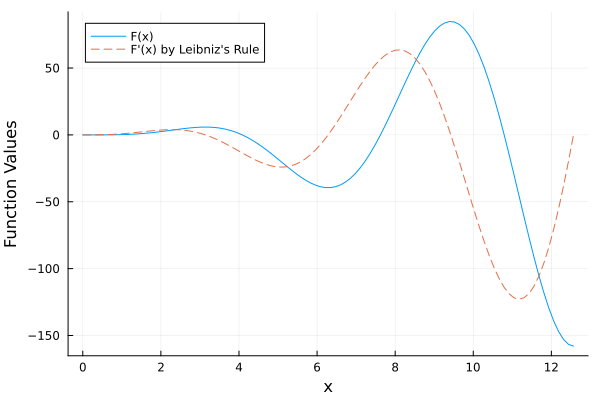

In [1]:
using SymPy
using Plots

# Define symbols and functions
@syms x t
f = t^2 * sin(t)

# Apply Leibniz's rule to find the derivative
F = integrate(f, (t, 0, x))
F_prime = diff(F, x)

# Convert symbolic expressions to functions for numerical evaluation
F_func = lambdify(F, [x])
F_prime_func = lambdify(F_prime, [x])

# Generate x values for plotting
x_values = range(0, stop=4π, length=100)

# Plot the original function and its derivative
plot(x_values, F_func.(x_values), label="F(x)")
plot!(x_values, F_prime_func.(x_values), label="F'(x) by Leibniz's Rule", linestyle=:dash, xlabel="x", ylabel="Function Values", legend=:topleft)


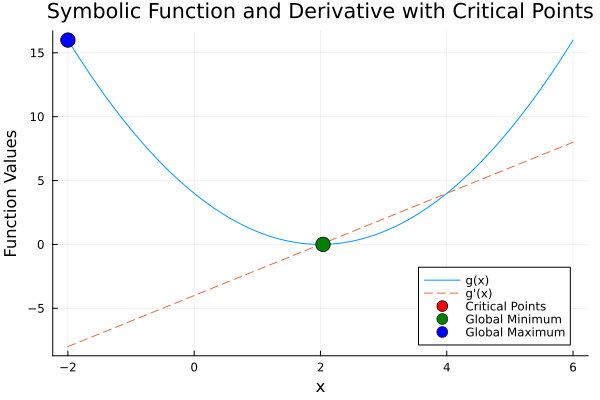

In [13]:
using SymPy
using Plots

# Define symbolic variables
@syms x

# Define the quadratic function g(x)
g(x) = x^2 - 4x + 4

# Find the derivative of g(x)
g_prime_sym = diff(g(x), x)

# Convert the symbolic functions to Julia functions for numerical evaluation
g_func = lambdify(g(x))
g_prime_func = lambdify(g_prime_sym)

# Generate x values for plotting
x_values = range(-2, stop=6, length=100)

# Evaluate the functions
g_values = g_func.(x_values)
g_prime_values = g_prime_func.(x_values)

# Find critical points (where the derivative is zero)
critical_points = [x for x in x_values if g_prime_func(x) ≈ 0]

# Find the global minimum and maximum
global_min_x = argmin(g_values)
global_max_x = argmax(g_values)

# Plot the function and its derivative
plot(x_values, g_values, label="g(x)")
plot!(x_values, g_prime_values, label="g'(x)", linestyle=:dash)

# Mark the critical points
scatter!(critical_points, g_func.(critical_points), label="Critical Points", color=:red, markersize=6)

# Mark the global minimum and maximum
scatter!([x_values[global_min_x]], [g_values[global_min_x]], label="Global Minimum", color=:green, markersize=8)
scatter!([x_values[global_max_x]], [g_values[global_max_x]], label="Global Maximum", color=:blue, markersize=8)

# Customize plot
title!("Symbolic Function and Derivative with Critical Points")
xlabel!("x")
ylabel!("Function Values")
# legend!(:topright)

# Show the plot
# display(plt)


The covariance matrix is given by the matrix inversion lemma (also known as the Woodbury matrix identity). 

The expression is:

$ C_{\theta | Y} = (C_{\theta\theta}^{-1} + H^T C_{VV}^{-1} H)^{-1} $

The covariance matrix in a Bayesian linear regression context.

In [46]:
using FFTW

In [51]:
include("operations.jl");

In [74]:
using LinearAlgebra
using Distributions

# Simulated data
Y = [1.0, 2.0, 3.0]
H = [1.0; 2.0; 3.0]

# Prior covariance matrix (assuming it's a diagonal matrix for simplicity)
c₀₀ = Diagonal([1.0])

# Likelihood (assuming Gaussian errors)
cᵥᵥ = 0.1 * I; cᵥᵥ⁻¹ = inv(cᵥᵥ)

UniformScaling{Float64}
10.0*I

In [80]:
# Bayesian update to calculate posterior covariance
# Using Transpose Matrix Hᵀ (3x1)
c₀ₗᵥ = ((c₀₀)⁻¹ .+ (H)ᵀ *  cᵥᵥ⁻¹ .* H)⁻¹

3×1 Matrix{Float64}:
 0.09090909090909091
 0.024390243902439025
 0.01098901098901099

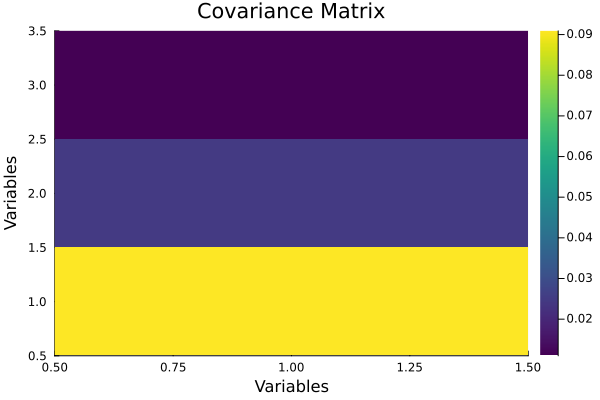

In [81]:
using Plots

# Plotting the covariance matrix as a heatmap
heatmap(c₀ₗᵥ, xlabel="Variables", ylabel="Variables", title="Covariance Matrix", c=:viridis)


In [82]:
# Bayesian update to calculate posterior covariance
# Using Ajoint Matrix H' (3x3)
c₀ₗᵥᵃ = ((c₀₀)⁻¹ .+ H' *  cᵥᵥ⁻¹ .* H)⁻¹

3×3 Matrix{Float64}:
 0.0909091  0.047619   0.0322581
 0.047619   0.0243902  0.0163934
 0.0322581  0.0163934  0.010989

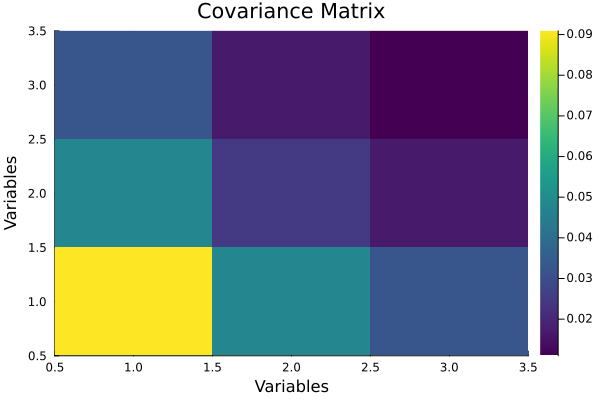

In [83]:
# Plotting the covariance matrix as a heatmap
heatmap(c₀ₗᵥᵃ, xlabel="Variables", ylabel="Variables", title="Covariance Matrix", c=:viridis)